# Assignment_3 SVM

In [12]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Part 2: SVM

### Use the following function to plot the classification regions

In [13]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [14]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=0 and 25% of the data for testing)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y,test_size=0.25, random_state=0)


#### Question 2
1. Train an SVM classifier using linear kernel.
2. Plot the classification regions using the training dataset.

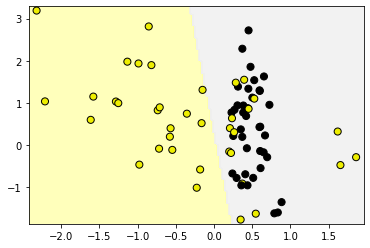

c [[1.71279818 0.18321389]]
b =  [-0.05424696]


In [16]:
from sklearn.svm import SVC
svc = SVC(kernel ='linear', C = 1).fit(X_train, y_train)
plot_class_regions_for_classifier(svc,X_train,y_train)
print("c",svc.coef_)
print('b = ',svc.intercept_)

#### Question 3
1. Train an SVM classifier using linear kernel with C=0.00001.
2. Train another SVM classifier using linear kernel with C=100
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

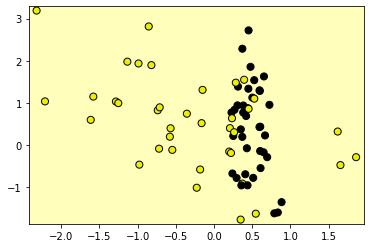

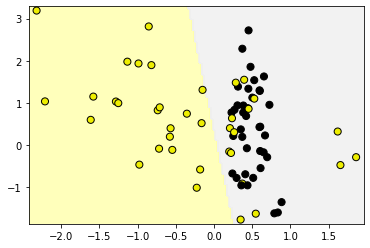

In [17]:
svc0 = SVC(kernel ='linear', C = 0.00001).fit(X_train, y_train)
svc100 = SVC(kernel ='linear', C = 100).fit(X_train, y_train)
plot_class_regions_for_classifier(svc0,X_train,y_train)
plot_class_regions_for_classifier(svc100,X_train,y_train)
#comment 
#increasing c menas boundries will get more defined
#decreasing c means less differntiation


### Use the fruits dataset in questions 4, 5, 6.

In [18]:
import pandas as pd
fruits = pd.read_table('fruit_data_with_color.txt')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
fruits

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=0, and 25% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm

In [19]:
X_fruits = fruits[feature_names_fruits]
#label=["fruit_label"]
y_fruits=fruits["fruit_label"]
new_features=["height","width"]
x_fruits_new=fruits[new_features].values
#x_fruits_new
X_trainf, X_testf, y_trainf, y_testf = train_test_split(x_fruits_new , y_fruits,test_size=0.25, random_state=0)
svc = SVC(kernel ='linear').fit(X_trainf, y_trainf)



#### Question 5
For the previous model from question 4. 
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

In [20]:
#4 models as there are 4 classes and the svm will do one vs all approch
print("c",svc.coef_)
print('b = ',svc.intercept_)


c [[ 0.74999906  0.24999969]
 [-1.0247669   0.17846357]
 [-1.10094816  1.55993033]
 [-0.73131977 -0.31796512]
 [-0.71065935  0.05076138]
 [-1.13258578  1.89213469]]
b =  [-6.07499311  7.02661228 -2.10267889  6.40858653  4.02537775 -3.82649862]


#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.

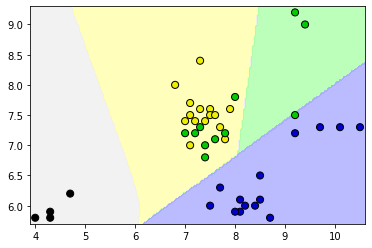

In [21]:
plot_class_regions_for_classifier(svc,X_trainf,y_trainf)


from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)### Use the breast cancer dataset in question 7, 8, and9.

In [22]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 0, and 25% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [23]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_cancer , y_cancer,test_size=0.25, random_state=0)

param = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
svm_model=svc0 = SVC(kernel ='rbf')
    #use gridsearch to test all values
svm_gscv = GridSearchCV(svm_model, param)
    #fit model to data
svm_gscv.fit(X_train, y_train)
svm_gscv.best_params_


{'C': 10, 'kernel': 'rbf'}

#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [24]:
svcb = SVC(kernel ='rbf', C = 10).fit(X_train, y_train)
print("train score",svcb.score(X_train,y_train))
print("test score",svcb.score(X_test,y_test))


train score 0.9154929577464789
test score 0.9370629370629371


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
#scaler = MinMaxScaler()
scaler = preprocessing.StandardScaler().fit(X_train)
scaled_x_train = scaler.transform(X_train)
#scaled_y_train=scaler.fit_transform(y_train)
scaled_x_test = scaler.transform(X_test)
#scaled_y_test=scaler.fit_transform(y_test)
svcb = SVC(kernel ='rbf', C = 10).fit(scaled_x_train, y_train)
print("train score",svcb.score(scaled_x_train,y_train))
print("test score",svcb.score(scaled_x_test,y_test))


train score 0.9882629107981221
test score 0.993006993006993
